## Problem 1
- works fine

In [19]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

Market clearing:  
  
$$
q_1^1 = -q_1^2 \\
q_2^1 = -q_2^2
$$
  
Utility maximasing problem for agent h:  
  
$$\max{v(c_0^h) + \frac{1}{4}\sum_{i=1}^{4}v(c_s^h)}$$  
$$\textit{s.t.  }c_0^h = e_0^h - p_1q_1^h - p_2q_2^h$$  
$$\textit{where  }c_s^h = e_s^h + q_1^hA_s^h + q_2^hA_s^h$$

In [2]:
e = np.array([[1,1,2,1,2],
              [1,3,1,3,1]])
A = np.array([[1,1,1,1],
              [1,1,1.5,1.5]])
gamma = 2


def v_prime(c, gamma):
    return c ** -gamma

def FOC(x):
    '''x is the list of unknowns [p1, p2, q1, q2]'''
    
    p1 = x[0]
    p2 = x[1]
    q1 = x[2]
    q2 = x[3]

    c = np.zeros((e.shape))
    c[0][0] = e[0][0] - p1*q1 - p2*q2
    c[1][0] = e[1][0] + p1*q1 + p2*q2
    
    for s in range(1,5):
        c[0][s] = e[0][s] + q1*A[0, s-1] + q2*A[1, s-1]
        c[1][s] = e[1][s] - q1*A[0, s-1] - q2*A[1, s-1]
    
    sum_11 = 0
    sum_12 = 0
    sum_21 = 0
    sum_22 = 0
    
    for s in range(1,5):
        sum_11 += v_prime(c[0][s], gamma) * A[0][s-1]
        sum_12 += v_prime(c[0][s], gamma) * A[1][s-1]
        sum_21 += v_prime(c[1][s], gamma) * A[0][s-1]
        sum_22 += v_prime(c[1][s], gamma) * A[1][s-1]

    FOC1 = - p1 * v_prime(c[0][0], gamma) + 1/4 * sum_11
    FOC2 = - p2 * v_prime(c[0][0], gamma) + 1/4 * sum_12
    FOC3 = - p1 * v_prime(c[1][0], gamma) + 1/4 * sum_21
    FOC4 = - p2 * v_prime(c[1][0], gamma) + 1/4 * sum_22

    return np.array([FOC1,FOC2,FOC3,FOC4])

print(optimize.root(FOC, x0 = [1,1,0,0]))

    fjac: array([[-0.68575796,  0.04625939, -0.72506109, -0.04338778],
       [-0.04925708, -0.77120037,  0.03530471, -0.63370128],
       [ 0.48620599,  0.46576638, -0.39264464, -0.6264947 ],
       [-0.53936397,  0.43147624,  0.56468591, -0.45171294]])
     fun: array([ 4.65238958e-11,  6.61867228e-11, -3.56298324e-11, -3.56995544e-11])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-4.92930660e-10, -1.19829763e-09, -2.36371148e-09, -3.77368201e-11])
       r: array([ 1.41574066, -0.01108599, -0.25926261, -0.33930651,  1.42822841,
        0.46175253,  0.56322445, -3.96922262, -5.06758189, -0.06033892])
  status: 1
 success: True
       x: array([5.89777656e-01, 7.37222070e-01, 1.95406655e-02, 8.83418572e-12])


## Problem 2
- set up works as the program did go through everything, but the iteration has some problems

In [5]:
# Suppose I take 1, opponent take 2
board = np.zeros((3,3), dtype = int)
# Value: 0 if intermediate or , 1 if win, -1 if lose
# Policy: assign 1 to one of the empty square

In [6]:
def initial_value(board, player = {'1', '2'}):
    value = 0
    for i in [0, 1, 2]:
        if (board[i][0], board[i][1], board[i][2]) == (1,1,1):
            value = 1
        elif (board[i][0], board[i][1], board[i][2]) == (2,2,2):
            value = -1
    for j in [0, 1, 2]:
        if (board[0][j], board[1][j], board[2][j]) == (1,1,1):
            value = 1
        elif (board[0][j], board[1][j], board[2][j]) == (2,2,2):
            value = -1
    if (board[0][0], board[1][1], board[2][2]) == (1,1,1):
        value = 1
    elif (board[0][0], board[1][1], board[2][2]) == (2,2,2):
        value = -1
    elif (board[2][0], board[1][1], board[0][2]) == (1,1,1):
        value = 1
    elif (board[2][0], board[1][1], board[0][2]) == (2,2,2):
        value = -1
    if player == '1':
        return value
    if player == '2':
        return value

In [7]:
board = np.zeros((3,3))
board[1,1] = 1
board[0,1] = 1
board[2,1] = 1
initial_value(board, '1')

1

In [8]:
def state_to_board(state_str):
    '''state is a string representation of the board'''
    board = np.eye(3, dtype = int)
    for i in range(len(state_str)):
        if 0 <= i <= 2:
            board[0][i] = int(state_str[i])
        elif 2 <= i <= 5:
            board[1][i-3] = int(state_str[i])
        else:
            print(i)
            board[2][i-6] = int(state_str[i])
    return board

In [9]:
def board_to_state(board):
    state_str = ''
    for i in range(len(board)):
        for j in range(len(board[0])):
            str_num = str(board[i][j])
            state_str += str_num
    return state_str

In [10]:
def disgard_move_first(board):
    state_str = board_to_state(board)    
    if abs(state_str.count('2') - state_str.count('1')) > 1:
        return False
    elif state_str.count('2') - state_str.count('1') > 0:
        return False
    # have to deal with same number of 1's and 2's but already ended
    else:
        return True
    
def disgard_move_second(board):
    state_str = board_to_state(board)    
    if abs(state_str.count('1') - state_str.count('2')) > 1:
        return False
    elif state_str.count('1') - state_str.count('2') > 0:
        return False
    else:
        return True

In [11]:
def mover_check(board):
    '''Return 1 if 1 should move, 2 if 2 should move'''
    state_str = board_to_state(board)
    if board.any() == np.zeros((3,3)).any():
        return '1'
    elif state_str.count('1') == state_str.count('2'):
        return '1'
    else:
        return '2'
    
def end_check(board):
    '''return a string if ends, False if not'''
    if initial_value(board, '1') == 1:
        return 'Game ended, computer wins'
    elif initial_value(board, '1') == -1:
        return 'Game ended, you win'
    elif board.all() != 0:
        return 'Game ended, draw'
    else:
        return False

def value_function(board, i):
    mover = mover_check(board)
    value = initial_value(board, mover)
    value += initial_value(policy_function(board, i), mover)
    return value

def policy_function(board, i):
    state_str = board_to_state(board)
    mover = mover_check(board)
    flatten_board = board.flatten()
    flatten_board[i] = int(mover)
    policy = flatten_board.reshape((3,3))
    return policy

In [12]:
def VFI(board):
    state_str = board_to_state(board)
    value = []
    policy = []
    i = 0
    while i < len(state_str):
        flatten_board = board.flatten()
        if abs(flatten_board[i] - 0) < 1e-6:
            policy.append(policy_function(board, i))
            value.append(value_function(board, i))
        i += 1
    board = policy_function(board, i-1)
    return value, policy

def iteration(board):
    mover = mover_check(board)
    values = [initial_value(board, mover)]
    policies = [board]
    i = 0
    while i < len(policies):
        board = policies[i]
        if end_check(board) == False:
            values += VFI(board)[0]
            policies += VFI(board)[1]
        i += 1
    return values, policies
        
    

In [14]:
board = np.array([[0,2,0],
                  [0,2,1],
                  [0,0,0]])
print(iteration(board)[0])

[0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, -1, -1, 0, -1, -1, 0, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, -1, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, -1, 0, 0, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


## Problem 3
- value function works fine, but policy function extraction seems to have some problems

In [16]:
production_func_1 = lambda k: 0.9*k**0.3 + 0.3*k
production_func_2 = lambda k: 1.1*k**0.3 + 0.9*k
u = lambda c: np.log(c)

N = 50 # number of grid_points for the capital grid
beta = 0.9 # discount factor
k_low = 0.1 # lower bound for capital grid
k_high = 1 # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N) # grid for capital
V_init = np.zeros_like(k_grid) # initial values

def actionvalue_allchoices(k_index, V_old):
    '''
    Calculates the current utility of all the discrete k's
    
    input:
    k_index: index so that k_grid[index] corresponds to value of capital this period (state)
    V_old: approximation to the value function, V_old[i] approximates V(k_grid[i])
    
    output:
    action_value: value of all possible state-action pairs.
    '''
    
    k = k_grid[k_index]
    
    action_value = np.zeros_like(k_grid)
    
    c1 = production_func_1(k) - k_grid # consumption implied by policy k_next for current k in state 1
    c2 = production_func_2(k) - k_grid # consumption implied by policy k_next for current k in state 2
    c = 0.5 * (c1 + c2)
    action_value[c <= 0] = -999999
    action_value[c > 0] = u(c[c > 0]) + beta * V_old[c > 0]
    
    return action_value

def vf_update(i, V_old):
    '''
    i: index corresponding to the entry of the value-function vector which was to be update by the function
    V_old: value function vector from the previous iteration
    
    output:
    Vi_new: updated value for the value function vector at entry i. 
    '''
    Vi_new = np.max(actionvalue_allchoices(i, V_old))
    pi = k_grid[np.argmax(actionvalue_allchoices(i, V_old))] # keep track of the policy
    
    return Vi_new, pi

In [18]:
def vf_update_iteration(V_old):
    
    V_new = np.zeros_like(V_old)
    
    maximum = -np.inf
    for i in range(len(V_old)):
        V_new[i] = vf_update(i, V_old)[0]
        
    return V_new

vf_update_iteration(V_init)

array([-0.77395117, -0.69672691, -0.63008075, -0.57131248, -0.5186465 ,
       -0.47085218, -0.42704105, -0.38655036, -0.34887236, -0.31360924,
       -0.28044344, -0.24911728, -0.21941873, -0.19117118, -0.1642259 ,
       -0.13845641, -0.11375426, -0.09002569, -0.06718911, -0.04517303,
       -0.02391446, -0.0033576 ,  0.01654724,  0.03584449,  0.05457405,
        0.07277188,  0.09047056,  0.10769964,  0.12448605,  0.14085438,
        0.15682717,  0.17242512,  0.18766729,  0.20257128,  0.21715336,
        0.23142862,  0.24541107,  0.25911375,  0.27254882,  0.28572762,
        0.29866079,  0.31135826,  0.32382937,  0.33608289,  0.34812707,
        0.35996968,  0.37161805,  0.38307911,  0.3943594 ,  0.40546511])

In [37]:
def iteration2convergence(initialV, maxiter, threshold, plot = False, plot_interval = None):
    difference_list = []
    V = initialV.copy()
    for i in range(maxiter):
        
        V_new = vf_update_iteration(V)
        difference = np.max(np.abs(V_new - V))
        
        difference_list.append(difference)
        
        V = V_new
        
        if plot == True:
            
            if difference < threshold:
                print('Convergence achieved after interation {}'.format(i + 1))
                plt.figure()
                plt.plot(k_grid, V)
                plt.xlabel('k')
                plt.ylabel('V(k)')
                plt.title('Value function after convergence')
                plt.show()
                break
            
        
            print('iteration: {}'.format(i + 1))
            if i%plot_interval == 1:
                plt.figure()
                plt.figure()
                plt.plot(np.arange(1, i+2), np.log10(np.array(difference_list)))
                plt.xlabel('Iteration')
                plt.ylabel('Maximum update [log10]')
                plt.show()
                
        return V

In [38]:
iteration2convergence(V_init, 1000, 1e-4)

array([-0.77395117, -0.69672691, -0.63008075, -0.57131248, -0.5186465 ,
       -0.47085218, -0.42704105, -0.38655036, -0.34887236, -0.31360924,
       -0.28044344, -0.24911728, -0.21941873, -0.19117118, -0.1642259 ,
       -0.13845641, -0.11375426, -0.09002569, -0.06718911, -0.04517303,
       -0.02391446, -0.0033576 ,  0.01654724,  0.03584449,  0.05457405,
        0.07277188,  0.09047056,  0.10769964,  0.12448605,  0.14085438,
        0.15682717,  0.17242512,  0.18766729,  0.20257128,  0.21715336,
        0.23142862,  0.24541107,  0.25911375,  0.27254882,  0.28572762,
        0.29866079,  0.31135826,  0.32382937,  0.33608289,  0.34812707,
        0.35996968,  0.37161805,  0.38307911,  0.3943594 ,  0.40546511])

In [52]:
def extract_policy_shock1(V):
    p = np.zeros_like(V)
    
    for i in range(len(p)):
        k = k_grid[i]
        candidate = u(production_func_1(k) - k_grid[0]) + beta * V[0]
        for j in range(len(k_grid)):
            if candidate < u(production_func_1(k) - k_grid[j]) + V[j] < np.max(V):
                candidate = u(production_func_1(k) - k_grid[j]) + V[j] < np.max(V)
                p[i] = k_grid[j]
                
    return p

extract_policy_shock1(iteration2convergence(V_init, 1000, 1e-4))

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


array([0.        , 0.        , 0.        , 0.17346939, 0.15510204,
       0.15510204, 0.15510204, 0.15510204, 0.15510204, 0.13673469,
       0.13673469, 0.13673469, 0.13673469, 0.13673469, 0.13673469,
       0.13673469, 0.13673469, 0.13673469, 0.13673469, 0.13673469,
       0.13673469, 0.13673469, 0.13673469, 0.13673469, 0.13673469,
       0.13673469, 0.13673469, 0.13673469, 0.13673469, 0.13673469,
       0.13673469, 0.13673469, 0.13673469, 0.13673469, 0.13673469,
       0.13673469, 0.13673469, 0.13673469, 0.13673469, 0.13673469,
       0.13673469, 0.13673469, 0.13673469, 0.13673469, 0.13673469,
       0.13673469, 0.13673469, 0.13673469, 0.13673469, 0.13673469])

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


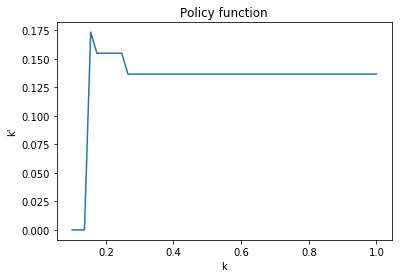

In [53]:
plt.figure()
plt.plot(k_grid, extract_policy_shock1(iteration2convergence(V_init, 1000, 1e-4)))
plt.xlabel('k')
plt.ylabel("k'")
plt.title('Policy function')
plt.show();

In [54]:
def extract_policy_shock2(V):
    p = np.zeros_like(V)
    
    for i in range(len(p)):
        k = k_grid[i]
        candidate = u(production_func_2(k) - k_grid[0]) + beta * V[0]
        for j in range(len(k_grid)):
            if candidate < u(production_func_1(k) - k_grid[j]) + V[j] < np.max(V):
                candidate = u(production_func_1(k) - k_grid[j]) + V[j] < np.max(V)
                p[i] = k_grid[j]
                
    return p

In [58]:
extract_policy_shock2(iteration2convergence(V_init, 1000, 1e-4))

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


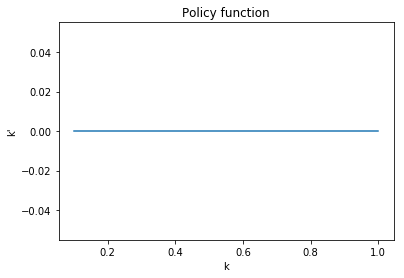

In [55]:
plt.figure()
plt.plot(k_grid, extract_policy_shock2(iteration2convergence(V_init, 1000, 1e-4)))
plt.xlabel('k')
plt.ylabel("k'")
plt.title('Policy function')
plt.show();